## This answers the FIRST sentence of 1a

In [1]:
library(fma)
library(fpp)
library(forecast)

Loading required package: tseries
Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: expsmooth
Loading required package: lmtest


In [2]:
#eggs
begEgg = start(eggs)[1]
endEgg = end(eggs)[1]

forecastLength = 10
xLimEnd = endEgg + forecastLength + 4
yLimBeg = -10

## Analysis of data
There is clearly a downward trend here. Since the data frequency is annual, we cannot extract any seasonality. Which is why it makes sense to use the Holt methods for smoothing. Holt methods allow for forecasting with trending, but not seasonality.

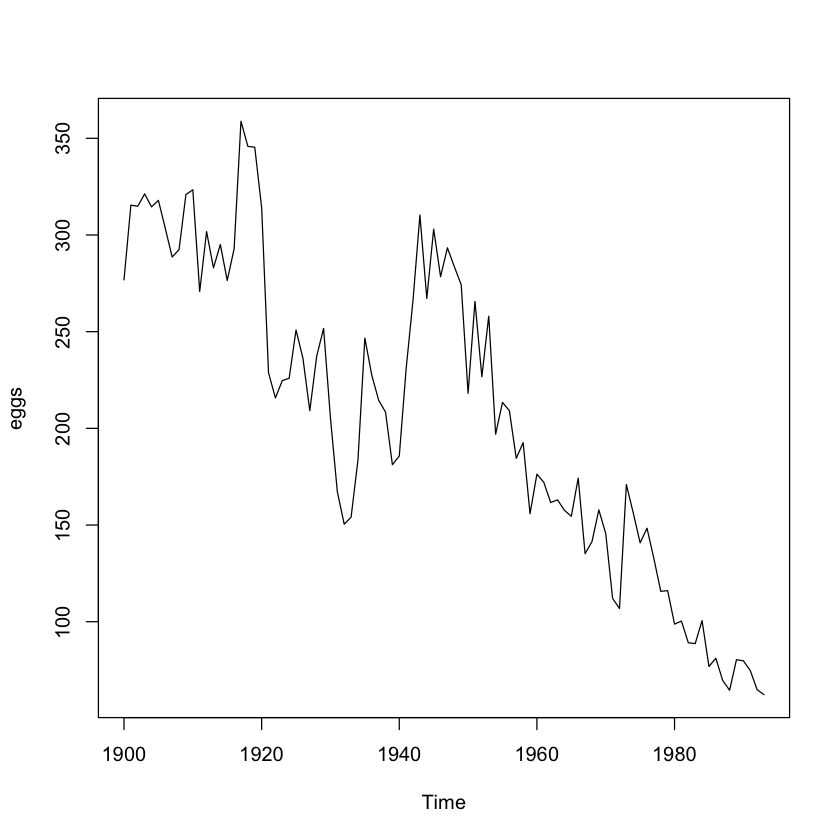

In [3]:
plot(eggs)

## Basic Holt Method

In [4]:
holtAdd = holt(eggs, damped=FALSE, exponential=FALSE, initial="simple", h=forecastLength)

In [29]:
accuracy(holtAdd)[2]

[1] 29.00223

In [5]:
summary(holtAdd)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(x = eggs, h = forecastLength, damped = FALSE, initial = "simple",  

 Call:
     exponential = FALSE) 

  Smoothing parameters:
    alpha = 0.9036 
    beta  = 0.1411 

  Initial states:
    l = 276.79 
    b = 38.63 

  sigma:  29.0022
Error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE
Training set -3.501793 29.00223 22.41495 -1.802756 11.03585 1.105696
                    ACF1
Training set -0.01676606

Forecasts:
     Point Forecast       Lo 80     Hi 80       Lo 95    Hi 95
1994       58.92016   21.752301  96.08801    2.076827 115.7635
1995       55.57080   -2.084309 113.22591  -32.605081 143.7467
1996       52.22145  -23.651669 128.09456  -63.816470 168.2594
1997       48.87209  -44.585615 142.32980  -94.059137 191.8033
1998       45.52274  -65.436676 156.48215 -124.175041 215.2205
1999       42.17338  -86.452876 170.79964 -154.543505 238.8903
2000       38.82403 -107.7

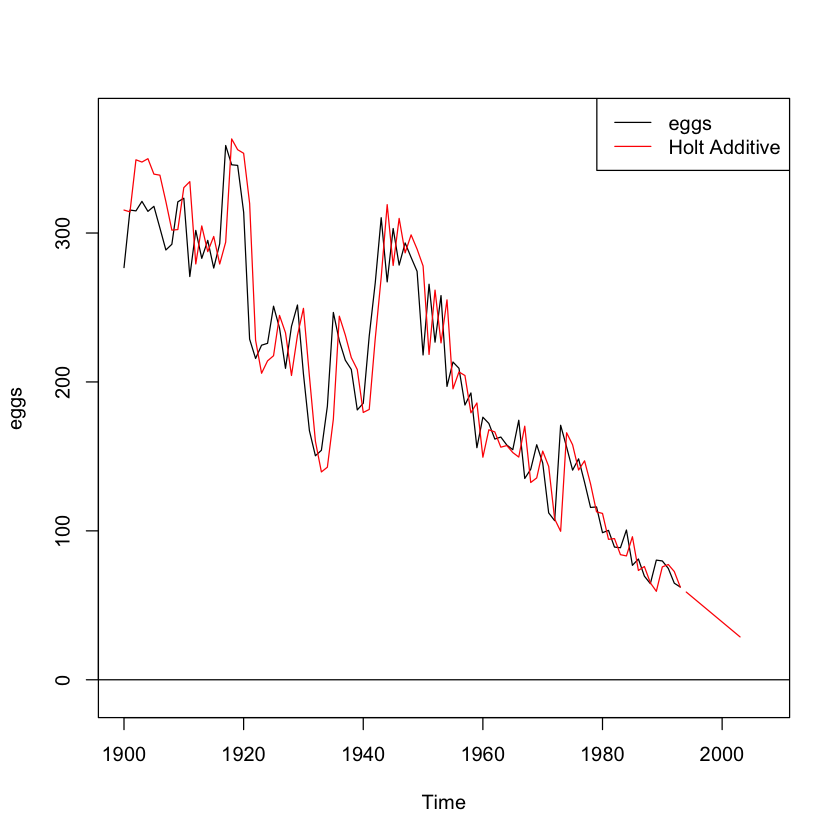

In [6]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values to original
lines(fitted(holtAdd), col="red")
# Plot the forecasted values
lines(holtAdd$mean, col="red")

legend("topright"
       , lty=1
       , col=c("black", "red")
       , c("eggs", "Holt Additive")
       )

## Exponential Holt Method

In [7]:
holtExpo = holt(eggs, damped=FALSE, exponential=TRUE, initial="simple", h=forecastLength)

In [8]:
summary(holtExpo)


Forecast method: Holt's method with exponential trend

Model Information:
Holt's method with exponential trend 

Call:
 holt(x = eggs, h = forecastLength, damped = FALSE, initial = "simple",  

 Call:
     exponential = TRUE) 

  Smoothing parameters:
    alpha = 0.8937 
    beta  = 0.1635 

  Initial states:
    l = 276.79 
    b = 1.1396 

  sigma:  0.1471
Error measures:
                    ME     RMSE     MAE       MPE     MAPE     MASE        ACF1
Training set -5.649901 29.47561 22.8287 -3.071663 11.28449 1.126106 -0.02113287

Forecasts:
     Point Forecast    Lo 80     Hi 80     Lo 95     Hi 95
1994       60.18790 49.02399  71.79799 42.911089  77.35064
1995       58.03385 42.53000  74.56599 36.212461  84.64195
1996       55.95688 37.23389  77.84826 30.132620  91.81998
1997       53.95425 32.71941  80.15204 25.166776  99.93558
1998       52.02329 28.24796  83.74734 20.819204 108.93030
1999       50.16144 24.95729  87.77394 17.214451 119.92876
2000       48.36622 21.67483  90.8805

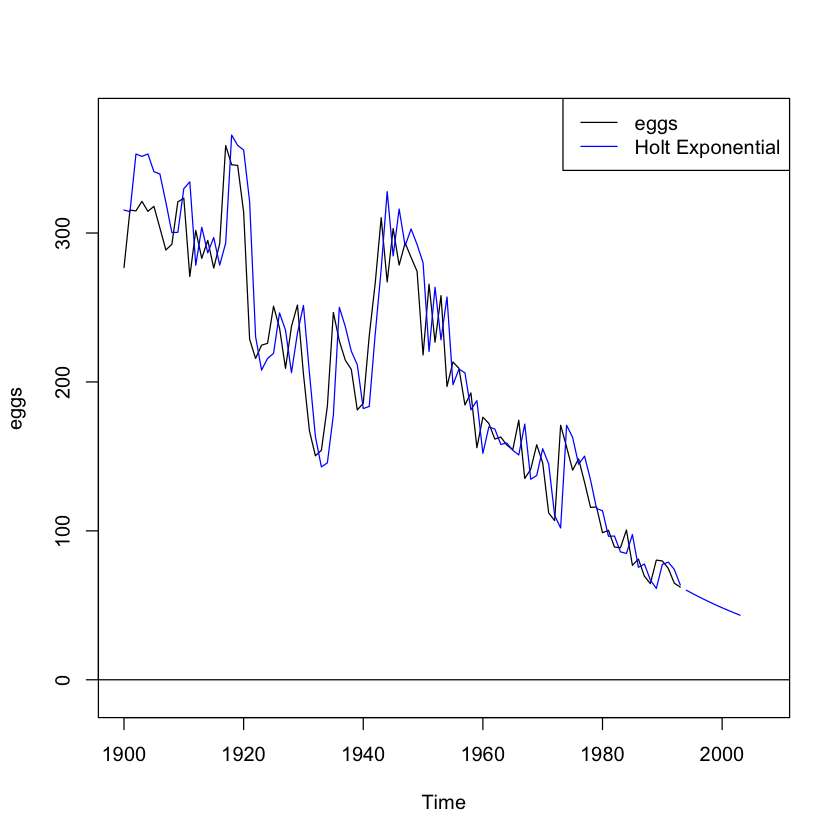

In [9]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values to original
lines(fitted(holtExpo), col="blue")
# Plot the forecasted values
lines(holtExpo$mean, col="blue")

legend("topright"
       , lty=1
       , col=c("black", "blue")
       , c("eggs", "Holt Exponential")
       )

## Damped Linear Holt Method

In [10]:
holtDampedAdd = holt(eggs, damped=TRUE, exponential=FALSE, initial="optimal", h=forecastLength)

In [11]:
summary(holtDampedAdd)


Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
 holt(x = eggs, h = forecastLength, damped = TRUE, initial = "optimal",  

 Call:
     exponential = FALSE) 

  Smoothing parameters:
    alpha = 0.8381 
    beta  = 1e-04 
    phi   = 0.8001 

  Initial states:
    l = 304.6577 
    b = 0.507 

  sigma:  26.662

     AIC     AICc      BIC 
1054.319 1055.000 1067.035 

Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -3.092257 26.66198 19.51158 -3.023266 10.11049 0.9624771
                     ACF1
Training set -0.005832122

Forecasts:
     Point Forecast      Lo 80     Hi 80      Lo 95    Hi 95
1994       62.96780  28.799095  97.13651  10.711274 115.2243
1995       62.96655  18.381509 107.55158  -5.220383 131.1535
1996       62.96554   9.972609 115.95847 -18.080153 144.0112
1997       62.96473   2.725577 123.20389 -29.163105 155.0926
1998       62.96409  -3.739175 129.66735 -39.049750 164.9779
1999 

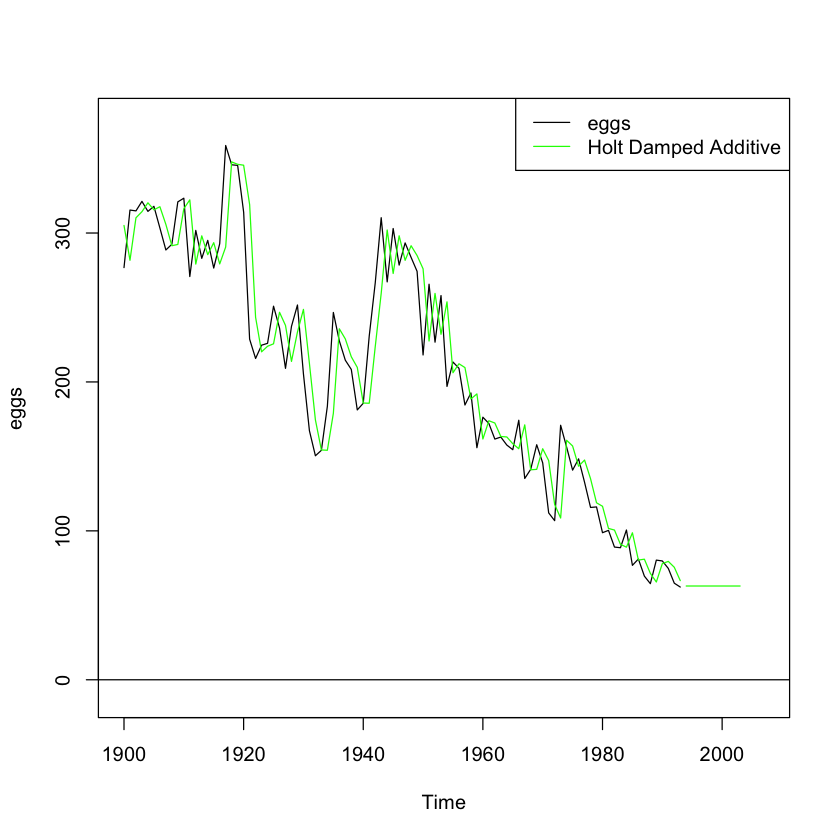

In [12]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values to original
lines(fitted(holtDampedAdd), col="green")
# Plot the forecasted values
lines(holtDampedAdd$mean, col="green")

legend("topright"
       , lty=1
       , col=c("black", "green")
       , c("eggs", "Holt Damped Additive")
       )

In [13]:
## Damped Exponential Holt Method

In [14]:
holtDampedExpo = holt(eggs, damped=TRUE, exponential=TRUE, initial="optimal", h=forecastLength)

In [15]:
summary(holtDampedExpo)


Forecast method: Damped Holt's method with exponential trend

Model Information:
Damped Holt's method with exponential trend 

Call:
 holt(x = eggs, h = forecastLength, damped = TRUE, initial = "optimal",  

 Call:
     exponential = TRUE) 

  Smoothing parameters:
    alpha = 0.8359 
    beta  = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 305.0617 
    b = 0.983 

  sigma:  0.1353

     AIC     AICc      BIC 
1047.382 1048.064 1060.098 

Error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.8824596 26.52585 19.51446 -2.100753 10.01524 0.9626188
                    ACF1
Training set 0.005081461

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
1994       62.78650 51.84685 73.68986 46.15892  79.85111
1995       62.62544 48.56199 77.21865 42.28089  85.31604
1996       62.46801 46.47831 79.77191 39.37193  90.37161
1997       62.31410 44.19426 81.64021 36.86221  94.63526
1998       62.16365 42.41908 84.32491 34.65

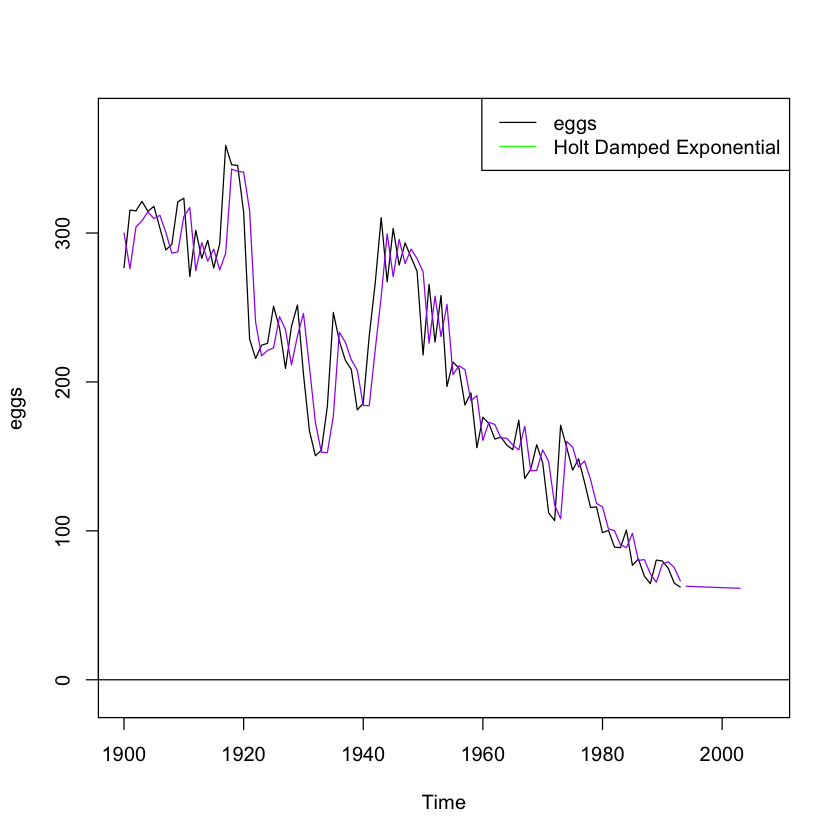

In [16]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values to original
lines(fitted(holtDampedExpo), col="purple")
# Plot the forecasted values
lines(holtDampedExpo$mean, col="purple")

legend("topright"
       , lty=1
       , col=c("black", "green")
       , c("eggs", "Holt Damped Exponential")
       )

## All Together Now

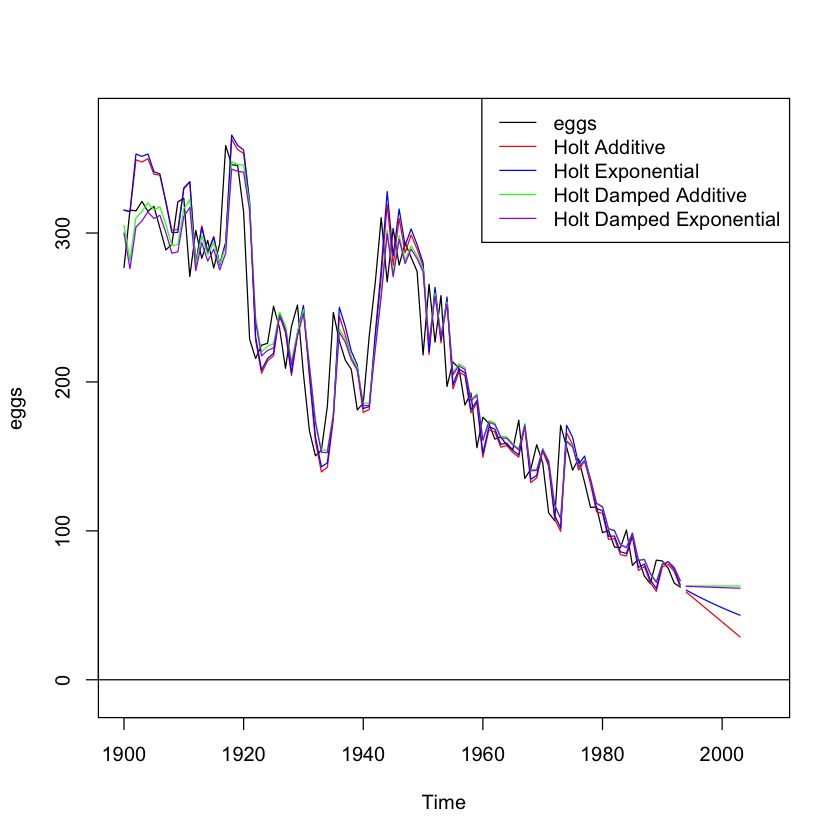

In [17]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values of Holt Additive
lines(fitted(holtAdd), col="red")
# Plot the forecasted values of Holt Additive
lines(holtAdd$mean, col="red")

# Plot the fitted values of Holt Exponential
lines(fitted(holtExpo), col="blue")
# Plot the forecasted values of Holt Exponential
lines(holtExpo$mean, col="blue")

# Plot the fitted values of Holt Damped Additive
lines(fitted(holtDampedAdd), col="green")
# Plot the forecasted values of Holt Damped Additive
lines(holtDampedAdd$mean, col="green")

# Plot the fitted values of Holt Damped Exponential
lines(fitted(holtDampedExpo), col="purple")
# Plot the forecasted values of Holt Damped Exponential
lines(holtDampedExpo$mean, col="purple")

legend("topright"
       , lty=1
       , col=c("black", "red", "blue", "green", "purple")
       , c("eggs", "Holt Additive", "Holt Exponential", "Holt Damped Additive", "Holt Damped Exponential")
       )